# **OpenAI SDK for Python Samples**

OpenAI Python SDK has two versions on the market, based on version 0.28.1 or 1.x, mainly for API access of different OpenAI models. Although many related SDKs are still on 0.28.1, as time goes by, 1.x SDKs have been gradually integrated into related content. Therefore, it is recommended that all beginners use the latest OpenAI SDK 

In [1]:
! pip install openai -U
! pip install python-dotenv -U
! pip install pillow -U
! pip install requests -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 3.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 3.8 MB/s eta 0:00:00


#### *import Azure OpenAI from OpenAI SDK*

In [2]:
import os
import dotenv
from openai import AzureOpenAI



In [3]:
dotenv.load_dotenv()

True

In [4]:
aoai_endpoint = os.environ['AZURE_OPENAI_ENDPOINT']
aoai_key = os.environ['AZURE_OPENAI_API_KEY']   
aoai_version = os.environ['AZURE_OPENAI_VERSION']  

### *init AzureOpenAI*

You need to get Azure OpenAI Service API Key and Endpoint in your azure portal

In [5]:
client = AzureOpenAI(
  azure_endpoint = aoai_endpoint, 
  api_key = aoai_key,  
  api_version = aoai_version
)

## **Text Completion**

Text completion is the most classic OpenAI feature. You can do text generation through it. In OpenAI, we initially used the GPT-3 davinci model for text completion. Now we use gpt-3.5-turbo-instruct to implement text completion.

OpenAI's text generation models (often called generative pre-trained transformers or large language models) have been trained to understand natural language, code, and images. The models provide text outputs in response to their inputs. The inputs to these models are also referred to as "prompts". Designing a prompt is essentially how you “program” a large language model model, usually by providing instructions or some examples of how to successfully complete a task.

Using OpenAI's text generation models, you can build applications to:

- Draft documents

- Write computer code

- Answer questions about a knowledge base

- Analyze texts

- Give software a natural language interface

- Tutor in a range of subjects

- Translate languages

- Simulate characters for games

In [6]:
response = client.completions.create(model='Your Azure OpenAI Service gpt-35-turbo-instruct Model Delployment Name' , prompt="How to learn AI", max_tokens=1000)

In [7]:
response.choices[0].text

'\n\n1. Understand the basics: Before diving into learning AI, it\'s important to have a basic understanding of what AI is and how it works. This includes understanding concepts such as machine learning, neural networks, and data processing.\n\n2. Learn programming languages: The most widely used programming languages for AI are Python, Java, and C++. Start by learning the basics of these languages and then move on to AI-specific libraries and frameworks such as TensorFlow, Scikit-learn, and Keras.\n\n3. Explore online courses: There are many online courses and platforms that offer AI and machine learning courses. Some popular options include Coursera, Udemy, and edX. These courses can range from beginner-level to more advanced topics.\n\n4. Read books and research papers: Reading books and research papers can give you a deep understanding of the principles and theories behind AI. Some recommended books include "Artificial Intelligence: A Modern Approach" by Stuart Russell and Peter No

## **Chat Completion**

Chat models take a list of messages as input and return a model-generated message as output. Although the chat format is designed to make multi-turn conversations easy, it’s just as useful for single-turn tasks without any conversation.

Using Chat, as the name suggests, is to generate more context in the chat scene. You can implement this scenario through gpt-4, gpt-4 turbo, gpt-3.5-turbo

The main input is the messages parameter. Messages must be an array of message objects, where each object has a role (either "system", "user", or "assistant") and content. Conversations can be as short as one message or many back and forth turns.

Typically, a conversation is formatted with a system message first, followed by alternating user and assistant messages.

The system message helps set the behavior of the assistant. For example, you can modify the personality of the assistant or provide specific instructions about how it should behave throughout the conversation. However note that the system message is optional and the model’s behavior without a system message is likely to be similar to using a generic message such as "You are a helpful assistant."

The user messages provide requests or comments for the assistant to respond to. Assistant messages store previous assistant responses, but can also be written by you to give examples of desired behavior.



In [8]:
response = client.chat.completions.create(
    model="Your Azure OpenAI Service gpt-35-turbo-16k Model Delployment Name", 
    messages=[
        {"role": "system", "content": "You are a AI teacher."},
        {"role": "user", "content": "Can you explain what is Machine Learning?"}
    ]
)

In [9]:
response.choices[0].message.content

'Machine Learning is a field of computer science that focuses on developing algorithms and techniques that allow computers to learn and improve from experience without being explicitly programmed. It is a subset of Artificial Intelligence and primarily deals with creating models that can learn patterns from the data and make predictions or decisions based on those patterns.\n\nIn traditional programming, a human programmer writes explicit instructions for the computer to follow. However, in Machine Learning, the computer itself learns by analyzing and interpreting large amounts of data. It identifies patterns, trends, and relationships within the data to make predictions or take actions without specific instructions.\n\nThere are different types of Machine Learning algorithms, including supervised learning, unsupervised learning, and reinforcement learning. In supervised learning, the algorithm is provided with labeled training data, where each example is associated with a known outcom

## **Image generation**

The ability to generate images from text is a very powerful function. OpenAI's image generation is mainly based on the DALL·E model, and now it mainly relies on DALL·E 3 for cooperation.

The Images API provides three methods for interacting with images:

- Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
  
- Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
  
- Creating variations of an existing image (DALL·E 2 only)

In [10]:
result = client.images.generate(
    model="Azure OpenAI Service dall-e-3 Model Delployment Name", 
    prompt="Chinese New Year picture for the Year of the Dragon",
    n=1
)

In [11]:
import os
import requests
from PIL import Image
import json

In [12]:
json_response = json.loads(result.model_dump_json())

In [13]:
image_dir = os.path.join(os.curdir, 'images')

In [14]:
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [15]:
image_path = os.path.join(image_dir, 'generated_image.png')

In [16]:
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [17]:
image = Image.open(image_path)

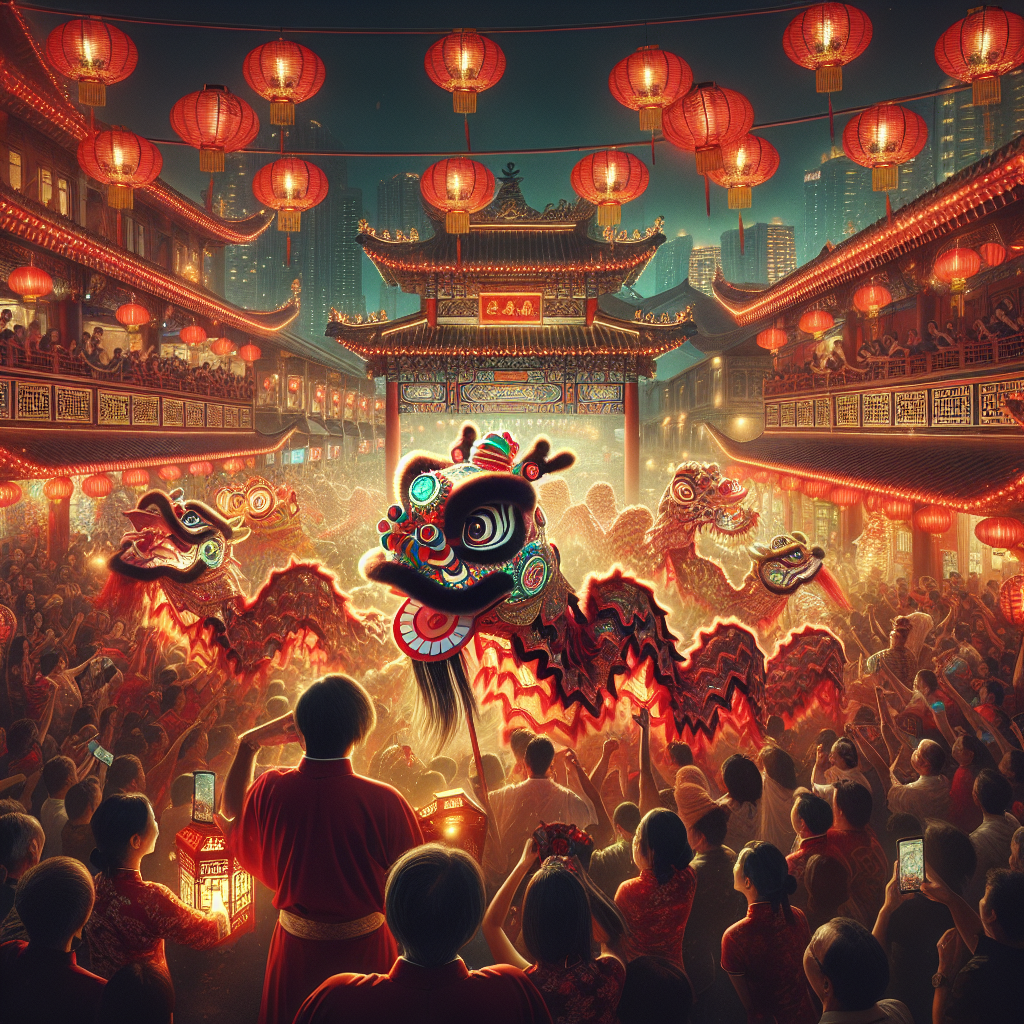

In [18]:

image